
# Introduction

This project analyzes the dataset of Titanic - contains demographics and passenger information from 891 of the 2224 passengers on board the Titanic. We can view a description of this dataset on the [Kaggle website](https://www.kaggle.com/c/titanic/data). Additional information about Titanic is available on the [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic).

In [1]:
# Server Information:
# The version of the Jupyter notebook server is 4.2.3 and is running on: Python 3.5.2 
# Anaconda custom (64-bit) (default, Jul 2 2016, 17:53:06) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Research questions: 
### - What factors made people more likely or not to survive?
### - How life passenger depends on the price of the bought ticket?


## First look at data

In [2]:
# titanic = pd.read_csv('titanic-data.csv')
titanic = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Conclusions:** Column *PassengerId* is equivalent to the index of a record. 
I removed the columns *Name* and *PassengerId*, which in future I will not be used.

In [4]:
del titanic['Name']
del titanic['PassengerId']

#### Variable Category:

- *Categorical:* Survived, Pclass, Sex, SibSp, Parch, Ticket, **Cabin\***, **Embarked\***.
- *Continuous:* **Age\***, Fare.

**\* - missing data**

### Summary statistics

In [5]:
t = titanic.describe(percentiles=[], include=['int64'])
t['Age'] = titanic[titanic.Age.notnull()][['Age']].describe(percentiles=[])
t['Fare'] = titanic[['Fare']].describe(percentiles=[])
display(t.T)
display(titanic.describe(percentiles=[], include=['object']).T)

,count,mean,std,min,50%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,3.0000,3.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,6.0000
Age,714.0,29.699118,14.526497,0.42,28.0000,80.0000
Fare,891.0,32.204208,49.693429,0.00,14.4542,512.3292


,count,unique,top,freq
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


**Conclusions:** Not all records contain information about age, cabin and port of embarkation.

### Categorical variables

In [6]:
# add more descriptive labels
titanic['Passenger Counts'] = 1
titanic['Survival'] = titanic.Survived.map({0 : 'Died',
                                            1 : 'Survived'})
titanic['Class'] = titanic.Pclass.map({1 : 'First Class',
                                       2 : 'Second Class',
                                       3 : 'Third Class'})
titanic['Ports'] = titanic.Embarked.map({'C' : 'Cherbourg',
                                         'Q' : 'Queenstown',
                                         'S' : 'Southampton'})
display(titanic[['Survival', 'Class', 'Ports']].describe(percentiles=[], include=['object']).T)

,count,unique,top,freq
Survival,891,2,Died,549
Class,891,3,Third Class,491
Ports,889,3,Southampton,644


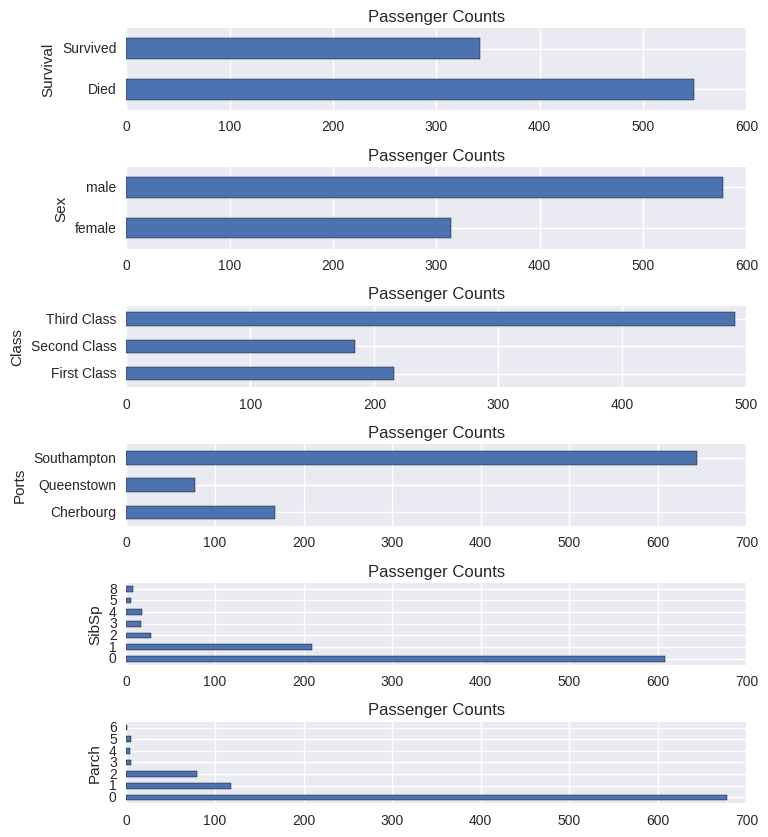

In [7]:
fig, axes = plt.subplots(6, figsize=(8,10))
plt.subplots_adjust(hspace=0.7)
titanic[['Passenger Counts', 'Survival']].groupby(['Survival']).count().plot.barh(subplots=True,
                                                            ax=axes[0], legend='')
titanic[['Passenger Counts', 'Sex']].groupby(['Sex']).count().plot.barh(subplots=True,
                                                            ax=axes[1], legend='')
titanic[['Passenger Counts', 'Class']].groupby(['Class']).count().plot.barh(subplots=True,
                                                            ax=axes[2], legend='')
titanic[['Passenger Counts', 'Ports']].groupby(['Ports']).count().plot.barh(subplots=True,
                                                            ax=axes[3], legend='')
titanic[['Passenger Counts', 'SibSp']].groupby(['SibSp']).count().plot.barh(subplots=True,
                                                            ax=axes[4], legend='')
titanic[['Passenger Counts', 'Parch']].groupby(['Parch']).count().plot.barh(subplots=True,
                                                            ax=axes[5], legend='')
show()

### Continuous variables

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


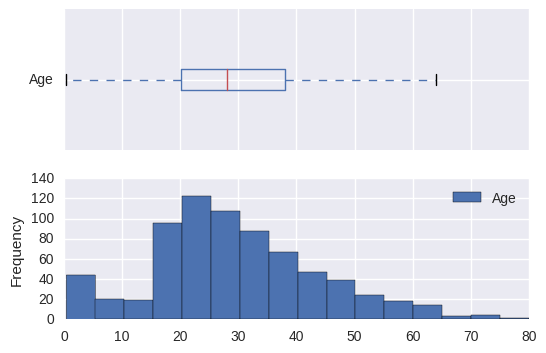

In [8]:
display(titanic[titanic.Age.notnull()][['Age']].describe().T)
fig, axes = plt.subplots(2, sharex=True)
titanic[titanic.Age.notnull()][['Age']].plot.box(vert=False, subplots=True, ax=axes[0])
titanic[titanic.Age.notnull()][['Age']].plot.hist(subplots=True, ax=axes[1], bins=16)
show()

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


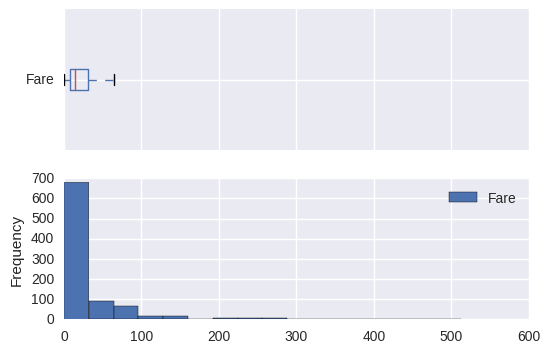

In [9]:
display(titanic[['Fare']].describe().T)
fig, axes = plt.subplots(2, sharex=True)
titanic[['Fare']].plot.box(vert=False, subplots=True, ax=axes[0])
titanic[['Fare']].plot.hist(subplots=True, ax=axes[1], bins=16)
show()

## Analysis
*What factors made people more likely or not to survive?*

### Variable "Survived"

In the words of the [Kaggle website](https://www.kaggle.com/c/titanic/data):
> Survived - Survival (0 = No; 1 = Yes)

In [10]:
PASSENGERS = titanic['Survived'].count()
LIVE = titanic['Survived'].sum()
MU = round(titanic['Survived'].mean(), 3)
print('\nWe have information about %s passengers, %s of whom survived, which is %s%%.'
      % (PASSENGERS, LIVE, MU * 100))


We have information about 891 passengers, 342 of whom survived, which is 38.4%.


### Statistics

To check the results, I will use the [Chi-Square Test for Independence](http://stattrek.com/chi-square-test/independence.aspx) and [Hypothesis Test of a Proportion (Small Sample)](http://stattrek.com/hypothesis-test/proportion-small-sample.aspx).

In [11]:
def pivot(data, indexes, columns):
    """ Create a spreadsheet-style table
        data = DataFrame; indexes, columns = lists.
    """
    return pd.pivot_table(data[indexes + columns], index = indexes,
                          columns = columns, aggfunc = len, fill_value=0)

In [12]:
def test_chisquare(data):
    """ Chi-Squared Tests
        http://stattrek.com/chi-square-test/independence.aspx
        It is used to determine whether there is a significant
        association between the two variables.
    """
    name_index = data.index.name
    name_column = data.columns.name
    
    err = []
    for idx in data.index.tolist():
        if np.min(data.ix[idx]) < 5:
            err.append(str(idx))
    if err:
        print('The expected frequency count for each cell of the table is at least 5.')
        print('Errors in %s: "%s"' % (name_index, '", "'.join(err)))
        return

    chi2, p_value, dof, expected = stats.chi2_contingency(data)
    
    print('>>> Chi-Squared Test on "{0}" to "{1}":'
          '\n\n    Null hypothesis:  Variable "{0}" and Variable "{1}" are independent.'
          '\n    Alternative hypothesis:  Variable "{0}" and Variable "{1}" are not independent.'
          '\n\nThese hypotheses constitute a one-tailed test. The significance level is 0.05.'
          '\nStatistic = {2}'
          ''.format(name_index, name_column, chi2))
    if p_value < 0.05:
        print('Since the p-value ({0}) is less than the significance level (0.05),'
              '\nwe cannot accept the null hypothesis.'
              '\nConclusion:\n    There is a relationship between Variable "{1}" and Variable "{2}."'
              ' <<<'.format(p_value, name_index, name_column))
    else:
        print('Since the p-value ({0}) is more than the significance level (0.05),'
              '\nwe cannot reject the null hypothesis.'
              '\nConclusion:\n    Variable "{1}" and Variable "{2}" are independent.'
              ' <<<'.format(p_value, name_index, name_column))

In [13]:
def test_proportion(data):
    """ Hypothesis Test of a Proportion
        http://stattrek.com/hypothesis-test/proportion-small-sample.aspx
    """
    data['Passengers'] = data.Died + data.Survived
    data['Proportion'] = data.Survived / data.Passengers
    mini = lambda x: stats.hypergeom(PASSENGERS, LIVE,x).interval(0.95)[0]/x
    maxi = lambda x: stats.hypergeom(PASSENGERS, LIVE,x).interval(0.95)[1]/x
    data['Mini'] = data.Passengers.apply(mini)
    data['Maxi'] = data.Passengers.apply(maxi)

    print("\nProportions for '%s'" % data.index.name)
    fig, ax = plt.subplots()
    plt.axhline(MU, color='r', lw=1, label='population MU=0.384')
    data['Proportion'].plot.bar(ax=ax, label='sample')
    plt.vlines(range(len(data)), data['Mini'], data['Maxi'], lw=3, color='lime', label='region of acceptance')
    plt.legend(loc='best', frameon=False)
    plt.ylim(ymax=1.0)
    plt.ylabel('Proportion')
    plt.show()

    for idx in data.index.tolist():
        live = data.ix[idx]['Survived']
        passengers = data.ix[idx]['Passengers']
        proportion = data.at[idx, 'Proportion']
        mini = data.at[idx,'Mini']
        maxi = data.at[idx,'Maxi']
        sample = "'{}'='{}'".format(data.index.name, idx)
        st = stats.hypergeom(PASSENGERS, LIVE, passengers)

        print('\n\n>>> Test of a Proportion for ({4}):\n'
              '\n    Null hypothesis: Proportion = {5}'
              '\n    Alternative hypothesis: Proportion != {5}\n'
              '\nThese hypotheses constitute a two-tailed test. The significance level is 0.05.'
              '\nSample have information about {0:0.0f} passengers, {1:0.0f} of whom survived.'
              '\nThe region of acceptance is [{2:0.3f}; {3:0.3f}]'
              ''.format(passengers, live, mini, maxi, sample, MU))
        
        if proportion > maxi:
            level = st.sf(live)
            print('Since the sample proportion ({0:0.3f}) is more than the region of acceptance,'
                  '\nwe cannot accept the null hypothesis at the {3} level of significance.'
                  '\nConclusions:\n    This factor ({4}) was essential for survival.'
                  ' <<<'.format(proportion, mini, maxi, level, sample))
            
        elif proportion < mini:
            level = st.cdf(live)
            print('Since the sample proportion ({0:0.3f}) is less than the region of acceptance,'
                  '\nwe cannot accept the null hypothesis at the {3} level of significance.'
                  '\nConclusions:\n    This factor ({4}) essentially influenced the likelihood to die.'
                  ' <<<'.format(proportion, mini, maxi, level, sample))
        else:
            print('Since the sample proportion ({0:0.3f}) is within the region of acceptance,'
                  '\nwe cannot reject the null hypothesis.'
                  ' <<<'.format(proportion, mini, maxi))

### Variable "Pclass" (Class)

In the words of the [Kaggle website](https://www.kaggle.com/c/titanic/data):
> Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
>
> SPECIAL NOTES:
> Pclass is a proxy for socio-economic status (SES)
> 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [14]:
tmp = pivot(titanic, ['Class'], ['Survival'])
display(tmp)

Survival,Died,Survived
Class,,
First Class,80,136
Second Class,97,87
Third Class,372,119


In [15]:
test_chisquare(tmp)

>>> Chi-Squared Test on "Class" to "Survival":

    Null hypothesis:  Variable "Class" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Class" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 102.88898875696056
Since the p-value (4.549251711298793e-23) is less than the significance level (0.05),
we cannot accept the null hypothesis.
Conclusion:
    There is a relationship between Variable "Class" and Variable "Survival." <<<



Proportions for 'Class'


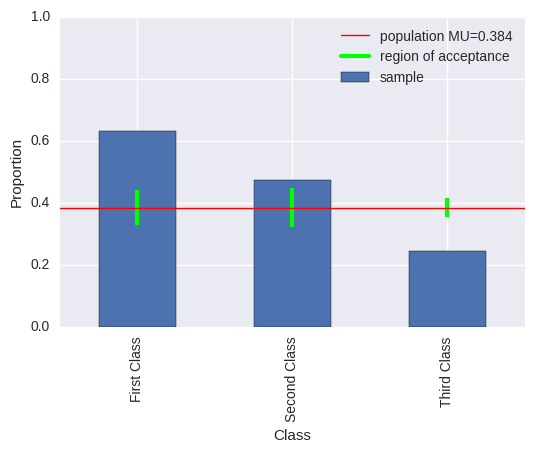



>>> Test of a Proportion for ('Class'='First Class'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 216 passengers, 136 of whom survived.
The region of acceptance is [0.329; 0.440]
Since the sample proportion (0.630) is more than the region of acceptance,
we cannot accept the null hypothesis at the 7.28653098952498e-18 level of significance.
Conclusions:
    This factor ('Class'='First Class') was essential for survival. <<<


>>> Test of a Proportion for ('Class'='Second Class'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 184 passengers, 87 of whom survived.
The region of acceptance is [0.321; 0.446]
Since the sample proportion (0.473) is more than the region of acceptance,
we ca

In [16]:
test_proportion(tmp)

### Variable "Sex"

In [17]:
tmp = pivot(titanic, ['Sex'], ['Survival'])
display(tmp)

Survival,Died,Survived
Sex,,
female,81,233
male,468,109


In [18]:
test_chisquare(tmp)

>>> Chi-Squared Test on "Sex" to "Survival":

    Null hypothesis:  Variable "Sex" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Sex" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 260.71702016732104
Since the p-value (1.1973570627755645e-58) is less than the significance level (0.05),
we cannot accept the null hypothesis.
Conclusion:
    There is a relationship between Variable "Sex" and Variable "Survival." <<<



Proportions for 'Sex'


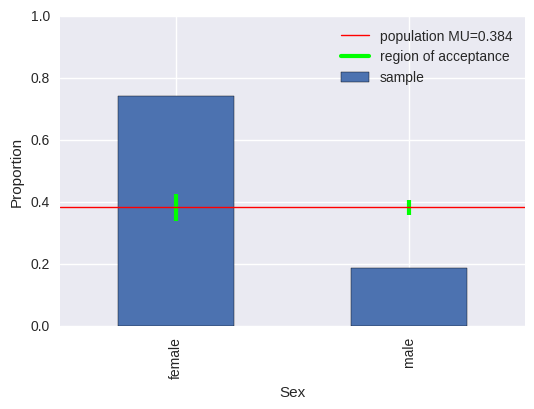



>>> Test of a Proportion for ('Sex'='female'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 314 passengers, 233 of whom survived.
The region of acceptance is [0.341; 0.427]
Since the sample proportion (0.742) is more than the region of acceptance,
we cannot accept the null hypothesis at the 2.883213646207149e-61 level of significance.
Conclusions:
    This factor ('Sex'='female') was essential for survival. <<<


>>> Test of a Proportion for ('Sex'='male'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 577 passengers, 109 of whom survived.
The region of acceptance is [0.360; 0.407]
Since the sample proportion (0.189) is less than the region of acceptance,
we cannot accept the null h

In [19]:
test_proportion(tmp)

### Variable "Embarked" (Ports)

Port of Embarkation (C = Cherbourg/France/; Q = Queenstown/Ireland/; S = Soutbhampton/United Kingdom/)

Not all passengers specified "Embarked". Clean data.

In [20]:
tmp = pivot(titanic[titanic.Ports.notnull()], ['Ports'], ['Survival'])
display(tmp)

Survival,Died,Survived
Ports,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


In [21]:
test_chisquare(tmp)

>>> Chi-Squared Test on "Ports" to "Survival":

    Null hypothesis:  Variable "Ports" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Ports" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 26.48914983923762
Since the p-value (1.769922284120912e-06) is less than the significance level (0.05),
we cannot accept the null hypothesis.
Conclusion:
    There is a relationship between Variable "Ports" and Variable "Survival." <<<



Proportions for 'Ports'


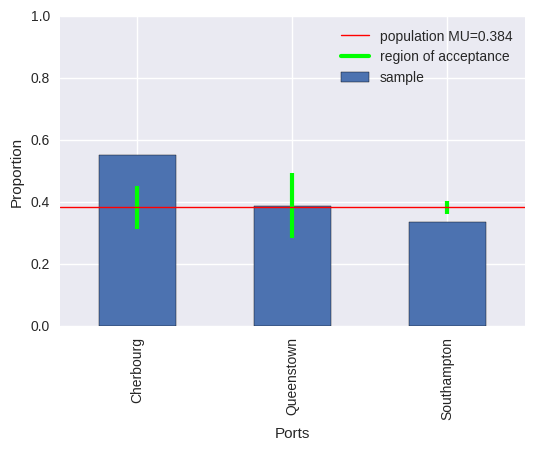



>>> Test of a Proportion for ('Ports'='Cherbourg'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 168 passengers, 93 of whom survived.
The region of acceptance is [0.315; 0.452]
Since the sample proportion (0.554) is more than the region of acceptance,
we cannot accept the null hypothesis at the 2.225890759874367e-07 level of significance.
Conclusions:
    This factor ('Ports'='Cherbourg') was essential for survival. <<<


>>> Test of a Proportion for ('Ports'='Queenstown'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 77 passengers, 30 of whom survived.
The region of acceptance is [0.286; 0.494]
Since the sample proportion (0.390) is within the region of acceptance,
we cannot rejec

In [22]:
test_proportion(tmp)

### Variable "Age"

In the words of the [Kaggle website](https://www.kaggle.com/c/titanic/data):

> Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5.

Not all passengers specified age. Clean data and divide into age category size ten years.

In [23]:
def age_intervals(number):
    """ Clean data and divide into age category size ten years.
    """
    if number > 0:
        out = int(number / 10) * 10
        return '[%s, %s)' % (str(out), str(out + 10))

titanic['Decades'] = titanic.Age.apply(age_intervals)
display(titanic[titanic.Age.notnull()].head().T)

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN
Embarked,S,C,S,S,S


In [24]:
tmp = pivot(titanic, ['Decades'], ['Survival'])
display(tmp)

Survival,Died,Survived
Decades,,
"[0, 10)",24,38
"[10, 20)",61,41
"[20, 30)",143,77
"[30, 40)",94,73
"[40, 50)",55,34
"[50, 60)",28,20
"[60, 70)",13,6
"[70, 80)",6,0
"[80, 90)",0,1


In [25]:
test_chisquare(tmp)

The expected frequency count for each cell of the table is at least 5.
Errors in Decades: "[70, 80)", "[80, 90)"


In [26]:
tmp = pivot(titanic[(titanic.Age.notnull()) & (titanic.Age < 70)], ['Decades'], ['Survival'])
display(tmp)

Survival,Died,Survived
Decades,,
"[0, 10)",24,38
"[10, 20)",61,41
"[20, 30)",143,77
"[30, 40)",94,73
"[40, 50)",55,34
"[50, 60)",28,20
"[60, 70)",13,6


In [27]:
test_chisquare(tmp)

>>> Chi-Squared Test on "Decades" to "Survival":

    Null hypothesis:  Variable "Decades" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Decades" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 15.364963264565597
Since the p-value (0.017600357025798832) is less than the significance level (0.05),
we cannot accept the null hypothesis.
Conclusion:
    There is a relationship between Variable "Decades" and Variable "Survival." <<<



Proportions for 'Decades'


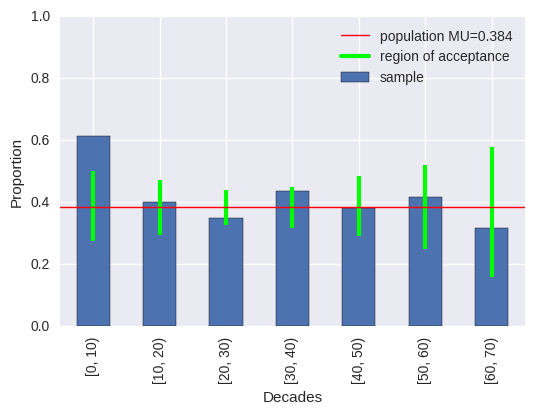



>>> Test of a Proportion for ('Decades'='[0, 10)'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 62 passengers, 38 of whom survived.
The region of acceptance is [0.274; 0.500]
Since the sample proportion (0.613) is more than the region of acceptance,
we cannot accept the null hypothesis at the 4.4720575420529034e-05 level of significance.
Conclusions:
    This factor ('Decades'='[0, 10)') was essential for survival. <<<


>>> Test of a Proportion for ('Decades'='[10, 20)'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 102 passengers, 41 of whom survived.
The region of acceptance is [0.294; 0.471]
Since the sample proportion (0.402) is within the region of acceptance,
we cannot reje

In [28]:
test_proportion(tmp)

### Variables "SibSp",  "Parch" and  "Ticket"

In the words of the [Kaggle website](https://www.kaggle.com/c/titanic/data):

> 
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
> 
SPECIAL NOTES:
> 
With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.
> 
- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
>
Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
> 

Let's count the number of family members per passenger.

In [29]:
titanic.loc[:, 'Family'] = titanic.SibSp + titanic.Parch + 1
print('The number of passengers traveling with family members:', len(titanic[titanic.Family > 1]))

The number of passengers traveling with family members: 354


As shown above, the number of different tickets is equal to 681, which is less than the number of passengers so that some passengers may use the one ticket for this trip and we will call them followers.

In [30]:
followers =  titanic[['Ticket', 'Passenger Counts']].groupby(['Ticket']).count()
for i in range(len(titanic)):
    titanic.loc[i, 'Follower'] = followers.ix[titanic.loc[i, 'Ticket']]['Passenger Counts']

print('The number of passengers traveling with follower:', len(titanic[titanic.Follower > 1]))

The number of passengers traveling with follower: 344


Let's unite the passengers in the group.

In [31]:
titanic.loc[:, 'Group'] = np.int64(np.maximum(titanic.Family, titanic.Follower))
print('The number of passengers traveling in one group:', len(titanic[titanic.Group > 1]))

The number of passengers traveling in one group: 429


In [32]:
display(titanic[titanic.Group > 1].head().T)

,0,1,3,7,8
Survived,0,1,1,0,1
Pclass,3,1,1,3,3
Sex,male,female,female,male,female
Age,22,38,35,2,27
SibSp,1,1,1,3,0
Parch,0,0,0,1,2
Ticket,A/5 21171,PC 17599,113803,349909,347742
Fare,7.25,71.2833,53.1,21.075,11.1333
Cabin,NaN,C85,C123,NaN,NaN
Embarked,S,C,S,S,S


In [33]:
tmp = pivot(titanic, ['Group'], ['Survival'])
display(tmp)

Survival,Died,Survived
Group,,
1,337,125
2,93,92
3,47,81
4,13,29
5,17,3
6,19,3
7,10,9
8,6,0
11,7,0


In [34]:
test_chisquare(tmp)

The expected frequency count for each cell of the table is at least 5.
Errors in Group: "5", "6", "8", "11"


In [35]:
tmp = tmp.drop([5, 6, 8, 11])
display(tmp)
test_chisquare(tmp)

Survival,Died,Survived
Group,,
1,337,125
2,93,92
3,47,81
4,13,29
7,10,9


>>> Chi-Squared Test on "Group" to "Survival":

    Null hypothesis:  Variable "Group" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Group" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 83.50731977328093
Since the p-value (3.1447723329088524e-17) is less than the significance level (0.05),
we cannot accept the null hypothesis.
Conclusion:
    There is a relationship between Variable "Group" and Variable "Survival." <<<



Proportions for 'Group'


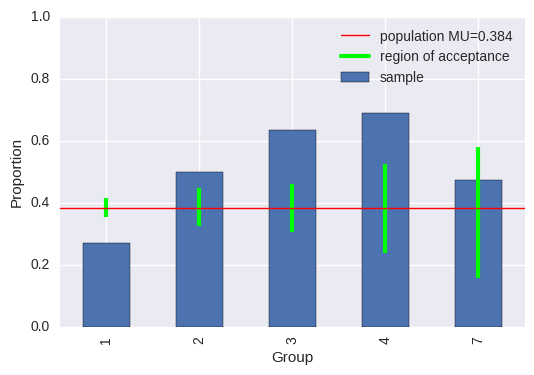



>>> Test of a Proportion for ('Group'='1'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 462 passengers, 125 of whom survived.
The region of acceptance is [0.353; 0.416]
Since the sample proportion (0.271) is less than the region of acceptance,
we cannot accept the null hypothesis at the 3.532233265194933e-13 level of significance.
Conclusions:
    This factor ('Group'='1') essentially influenced the likelihood to die. <<<


>>> Test of a Proportion for ('Group'='2'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 185 passengers, 92 of whom survived.
The region of acceptance is [0.324; 0.449]
Since the sample proportion (0.497) is more than the region of acceptance,
we cannot accept 

In [36]:
test_proportion(tmp)

### Variable "Cabin"

Not all passengers specified "Cabin". Clean data and get the first letter for a deck.

In [37]:
cabin = titanic[titanic.Cabin.notnull()]
print([x for x in sorted(cabin['Cabin'].unique()) if ' ' in x])

['B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B82 B84', 'B96 B98', 'C22 C26', 'C23 C25 C27', 'C62 C64', 'D10 D12', 'F E69', 'F G63', 'F G73']


Let's delete records with cabins 'F E69', 'F G63', 'F G73'.

In [38]:
todelete = cabin[cabin.Cabin.str.startswith('F ')].index.tolist()
cabin = cabin.drop(todelete)
print([x for x in sorted(cabin['Cabin'].unique()) if ' ' in x])

['B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B82 B84', 'B96 B98', 'C22 C26', 'C23 C25 C27', 'C62 C64', 'D10 D12']


In [39]:
cabin['Deck'] = cabin.Cabin.str[0]
display(cabin[['Cabin', 'Deck', 'Pclass']].groupby(['Deck', 'Pclass']).count().T)

Deck     A   B   C   D      E        F     G  T
Pclass   1   1   1   1  2   1  2  3  2  3  3  1
Cabin   15  47  59  29  4  25  4  3  8  1  4  1

In [40]:
tmp = pivot(cabin, ['Deck'], ['Survival'])
display(tmp)

Survival,Died,Survived
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,2,7
G,2,2
T,1,0


In [41]:
test_chisquare(tmp)

The expected frequency count for each cell of the table is at least 5.
Errors in Deck: "F", "G", "T"


In [42]:
tmp = tmp.drop(["F", "G", "T"])
display(tmp)
test_chisquare(tmp)

Survival,Died,Survived
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24


>>> Chi-Squared Test on "Deck" to "Survival":

    Null hypothesis:  Variable "Deck" and Variable "Survival" are independent.
    Alternative hypothesis:  Variable "Deck" and Variable "Survival" are not independent.

These hypotheses constitute a one-tailed test. The significance level is 0.05.
Statistic = 7.677765569767013
Since the p-value (0.10412127844381484) is more than the significance level (0.05),
we cannot reject the null hypothesis.
Conclusion:
    Variable "Deck" and Variable "Survival" are independent. <<<



Proportions for 'Deck'


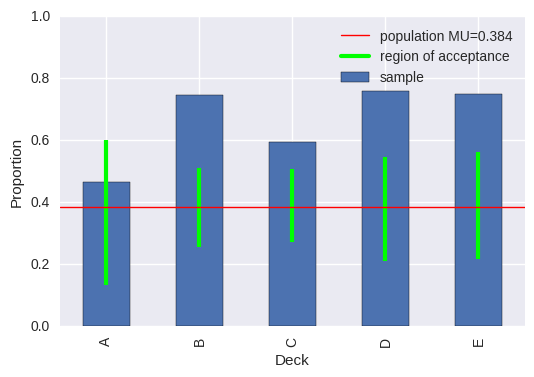



>>> Test of a Proportion for ('Deck'='A'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 15 passengers, 7 of whom survived.
The region of acceptance is [0.133; 0.600]
Since the sample proportion (0.467) is within the region of acceptance,
we cannot reject the null hypothesis. <<<


>>> Test of a Proportion for ('Deck'='B'):

    Null hypothesis: Proportion = 0.384
    Alternative hypothesis: Proportion != 0.384

These hypotheses constitute a two-tailed test. The significance level is 0.05.
Sample have information about 47 passengers, 35 of whom survived.
The region of acceptance is [0.255; 0.511]
Since the sample proportion (0.745) is more than the region of acceptance,
we cannot accept the null hypothesis at the 4.9950941058064776e-08 level of significance.
Conclusions:
    This factor ('Deck'='B') was essential for survival. <<<




In [43]:
test_proportion(tmp)

### Variable "Fare"

In the words of the [Kaggle website](https://www.kaggle.com/c/titanic/data):
> Fare - Passenger Fare


[Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic).
> Fares varied depending on class and season. Third Class fares from London, Southampton, or Queenstown cost £7 5s (equivalent to £647 today) while the cheapest First Class fares cost £23 (£2,054 today).

How life passenger depends on the price of the bought ticket?

In [44]:
# clear data
fare = titanic[(titanic.Fare > 0)][['Survived', 'Fare']].sort_values(['Fare'])
fare.index = range(len(fare))

In [45]:
# split fare for bind
bins = 10
binlen = (len(fare) + bins - 1) // bins
fare['Bin'] = fare.index
fare['Bin'] = fare.Bin.apply(lambda x: (x + binlen) // binlen)

Bin,1,2,3,4,5,6,7,8,9,10
Survived,0.170455,0.306818,0.159091,0.250000,0.386364,0.488636,0.465909,0.386364,0.545455,0.750000
Fare,7.159757,7.794274,7.968123,9.487309,13.169747,18.129495,25.923011,33.050426,60.921451,149.248013


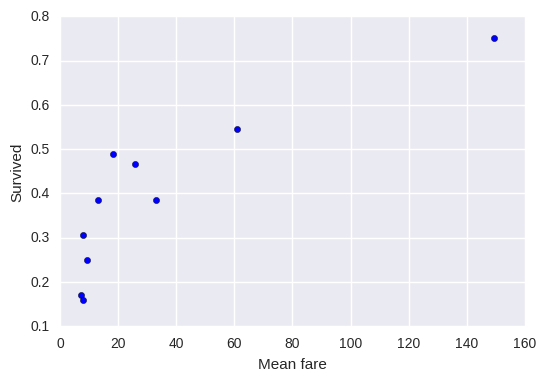

In [46]:
# plot
t = fare.groupby(['Bin']).mean()
display(t.T)
plt.scatter(t['Fare'], t['Survived'])
plt.xlabel('Mean fare')
plt.ylabel('Survived')
show()

In [47]:
print('Correlation of columns')
display(t.corr())

Correlation of columns


,Survived,Fare
Survived,1.000000,0.848488
Fare,0.848488,1.000000


**Conclusion:** The survival has the correlation with the fare.

## Conclusions

From the above, we can get answers to our questions.

### - What factors made people more likely or not to survive?

There is a relationship between variable "Survival" and variables:
- "Class" (Pclass)
- "Sex"
- "Ports" (Embarked)
- "Decades" (Age)
- "Group" (SibSp, Parch, Ticket)


The factors that were essential for survival:
- Class = 'First Class' or 'Second Class'
- Sex = 'female'
- Ports = 'Cherbourg'
- Age in [0, 10)
- Group = 2 or 3 or 4
- Deck = 'B' or 'C' or 'D' or 'E'


The factors that essentially influenced the likelihood to die:
- Class = 'Third Class'
- Sex = 'male'
- Ports = Southampton
- Group = 1


### - How life passenger depends on the price of the bought ticket?

We got a positive correlation between survival and the ticket price. But we can not argue that the increase in the ticket price leads to an increase in the probability of survival.